In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2 : Dataset loading
file_path = r"C:\Users\dariu\Desktop\Anomaly-detection-in-Microservices-based-systems\service anomalies dataset\service_anomalies.csv" 
df = pd.read_csv(file_path)

In [ ]:
# step 3 : Data preprocessing
df['IsError'] = df['IsError'].astype(int)

# Delete 'Time' column for model training
X = df.drop(columns=['Time', 'IsError'])
y = df['IsError']

# Data normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Étape 4 : Entraînement du modèle One-Class SVM
# On utilise uniquement les données normales (IsError == 0) pour entraîner
X_train = X_scaled[y == 0]

oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.45)  # nu = taux d’anomalies attendu
oc_svm.fit(X_train)

OneClassSVM(gamma='auto', nu=0.45)

In [14]:
# Étape 5 : Prédiction sur tout le jeu de données
y_pred = oc_svm.predict(X_scaled)

# Re-mapper les prédictions (-1 = anomalie, 1 = normal)
y_pred = np.where(y_pred == -1, 1, 0)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.55      0.69      1043
           1       0.68      0.96      0.79      1031

    accuracy                           0.75      2074
   macro avg       0.81      0.75      0.74      2074
weighted avg       0.81      0.75      0.74      2074

Global Classification Report:
Accuracy: 0.75
Precision: 0.68
Recall: 0.96
F1-Score: 0.79

Matrice de confusion:


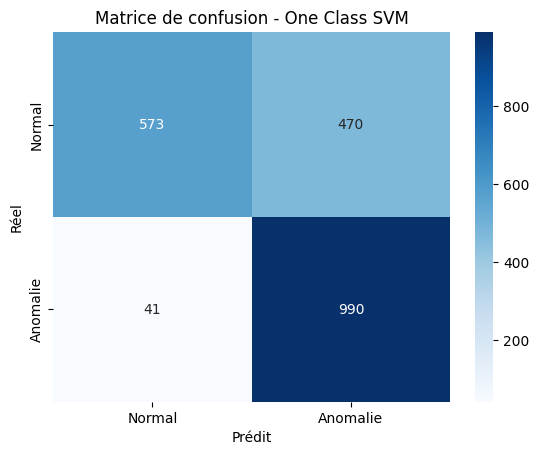

In [ ]:
# Étape 6 : Évaluation
print("Classification Report:")
print(classification_report(y, y_pred))

In [ ]:
print("\nMatrice de confusion:")
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Anomalie"], yticklabels=["Normal", "Anomalie"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - One Class SVM")
plt.show()

In [ ]:
print("Global Classification Report:")
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

In [16]:
df['predicted_label'] = y_pred
df_anomalies = df[df['predicted_label'] == 1]
print(df_anomalies.head())

                    Time  99th quantile  50th quantile    Mean    2xx  \
125  2023-02-22 21:19:00          2.380        0.00509  0.0966  742.0   
127  2023-02-22 21:20:00          0.791        0.00543  0.0451  809.0   
128  2023-02-22 21:20:30          0.520        0.00518  0.0348  789.0   
129  2023-02-22 21:21:00          0.492        0.00533  0.0397  740.0   
130  2023-02-22 21:21:30          0.486        0.00532  0.0390  847.0   

     4xx/5xx  IsError  predicted_label  
125     44.4        0                1  
127     62.2        0                1  
128     64.4        0                1  
129     55.6        0                1  
130     62.2        0                1  


In [18]:
matching_rows = df_anomalies[df_anomalies['IsError'] == df_anomalies['predicted_label']]

print(matching_rows)


                     Time  99th quantile  50th quantile     Mean    2xx  \
186   2023-02-22 21:18:30        7.29000         3.9200  2.89000  14.00   
187   2023-02-22 21:19:00        4.92000         2.0300  2.07000  24.40   
188   2023-02-22 21:19:30        2.47000         1.2000  1.05000  20.00   
189   2023-02-22 21:20:00        0.98200         0.4110  0.47300  24.40   
190   2023-02-22 21:20:30        0.74100         0.4250  0.46600  15.60   
...                   ...            ...            ...      ...    ...   
2008  2023-03-21 17:02:30        0.00495         0.0025  0.00320  11.10   
2009  2023-03-21 17:03:00        0.00495         0.0025  0.00351   6.67   
2010  2023-03-21 17:03:30        0.00495         0.0025  0.00265   6.67   
2011  2023-03-21 17:04:00        0.00495         0.0025  0.00268  11.10   
2012  2023-03-21 17:04:30        0.00495         0.0025  0.00279   4.44   

      4xx/5xx  IsError  predicted_label  
186       0.0        1                1  
187       0.0  

In [19]:
count_matching_rows = matching_rows.shape[0]
print(f"Nombre de lignes où la prédiction correspond à la réalité : {count_matching_rows}")
count_anomalies = df_anomalies.shape[0]
print(f"Nombre total d'anomalies détectées : {count_anomalies}")
print(f"Pourcentage d'anomalies détectées correctement : {count_matching_rows / count_anomalies * 100:.2f}%")

Nombre de lignes où la prédiction correspond à la réalité : 990
Nombre total d'anomalies détectées : 1460
Pourcentage d'anomalies détectées correctement : 67.81%
